# Bagging: árbol

En este notebook clasificaremos si una instancia tiene alto poder adquisitivo mediante Bagging (con un árbol de decisión)

Se utilizarán dos preprocessings diferentes:
* Las variables utilizadas en la primera parte del trabajo práctico.
* Todas las variables sin modificación alguna

In [2]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Búsqueda
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Otros
import pandas as pd
from preprocessing import preprocessing_base_parte_1
import utils

# Plots
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = utils.get_data()

### Modelo 1 - Preprocessing parte 1

Este Bagging será entrenado con las siguientes variables:

* **Ganancia/Pérdida declara en la bolsa argentina**: `ganancia_perdida_declarada_bolsa_argentina`
* **Edad**: `edad`
* **Rol familiar registrado**: `rol_familiar_registrado`
* **Años estudiados**: `anios_estudiados`

In [7]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
Y = df['tiene_alto_valor_adquisitivo']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, Y, random_state=27)

X_train_1, X_test_1 = preprocessing_base_parte_1(X_train_1, X_test_1)

In [8]:
bagging1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators = 501,
                            n_jobs=-1,
                            random_state=27)

In [9]:
bagging1.fit(X_train_1, y_train_1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=501,
                  n_jobs=-1, random_state=27)

In [10]:
print(classification_report(y_test_1, bagging.predict(X_test_1)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6186
           1       0.75      0.61      0.67      1955

    accuracy                           0.86      8141
   macro avg       0.82      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141



Vemos que el modelo resulta bueno. Un accuray de 86%, precision de unos relativamente alta como así también relativamente alto recall de unos.

Veamos ahora la matriz de confusión

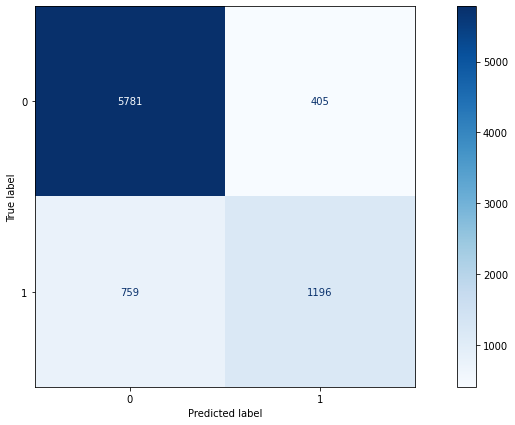

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(bagging1, X_test_1, y_test_1, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax)
plt.show()

La matriz de confusión nos muestra la alta canidad de falsos negativos.


Veamos la curva ROC y su puntuación AUC

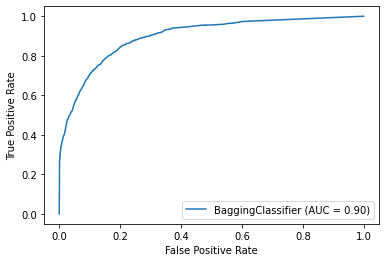

In [12]:
plot_roc_curve(bagging1, X_test_1, y_test_1)

In [13]:
print("El score de RocAUC es de: ", round(roc_auc_score(y_test_1, bagging1.predict_proba(X_test_1)[:, 1]), 4))

El score de RocAUC es de:  0.8985


Se obtuvieron buenos scores.

## Modelo 3 - Sin preprocesamiento

La idea de este modelo es dejar que RandomForest se entrene sin sesgar las features a utilizar (que pueda utilizar absolutamente todas)

Creemos que esto se justifica ya que RandomForest busca realizar la votación de múltiples árboles relativamente diferentes entre sí, por lo que tiene sentido dejar todas las variables.

Veamos qué sucede!

In [14]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
X = pd.get_dummies(X, drop_first=True)
Y = df['tiene_alto_valor_adquisitivo']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, Y, random_state=27)

In [15]:
bagging2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators = 1001,
                            n_jobs=-1,
                            random_state=27)

In [16]:
bagging2.fit(X_train_2, y_train_2)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1001,
                  n_jobs=-1, random_state=27)

In [18]:
print(classification_report(y_test_2,bagging2.predict(X_test_2)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6186
           1       0.70      0.65      0.67      1955

    accuracy                           0.85      8141
   macro avg       0.80      0.78      0.79      8141
weighted avg       0.85      0.85      0.85      8141



Un modelo interesante.

El recall de unos dio apenas por encima del modelo anterior, y su precision emperó apenas por debajo.

Luego, el accuracy dio 85%, por lo que el modelo es decente.

Veamos la matriz de confusión

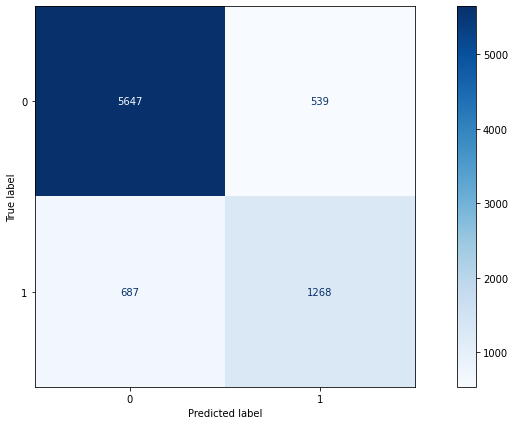

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(bagging2, X_test_2, y_test_2, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax)
plt.show()

Las conclusiones son similares a la anterior matriz de confusión, salvo que aquí se puede ver como aproximadamente se equilibraron ambos errores (FN y FP)

Por último veams la curva ROC y su puntuación AUC

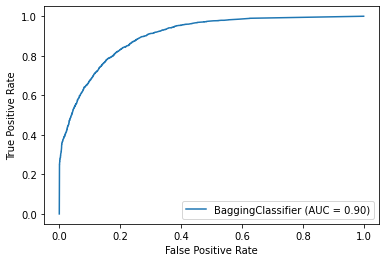

In [23]:
plot_roc_curve(bagging2, X_test_2, y_test_2)

In [29]:
print("El score de RocAUC es de: ", round(roc_auc_score(y_test_2, bagging2.predict_proba(X_test_2)[:, 1]), 4))

El score de RocAUC es de:  0.9016


Valores buenos

# Persistiendo los modelos

In [26]:
import pickle

In [27]:
pickle.dump(bagging1, open("Bagging/bagging1.pickle", "wb"))
pickle.dump(bagging2, open("Bagging/bagging2.pickle", "wb"))

In [32]:
bagging_fachero = pickle.load(open("Bagging/bagging1.pickle", "rb"))